In [27]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [72]:
df = pd.read_csv(r'C:\Users\krish\Desktop\Subjects\AppliedML\Lec-4\JPM.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000


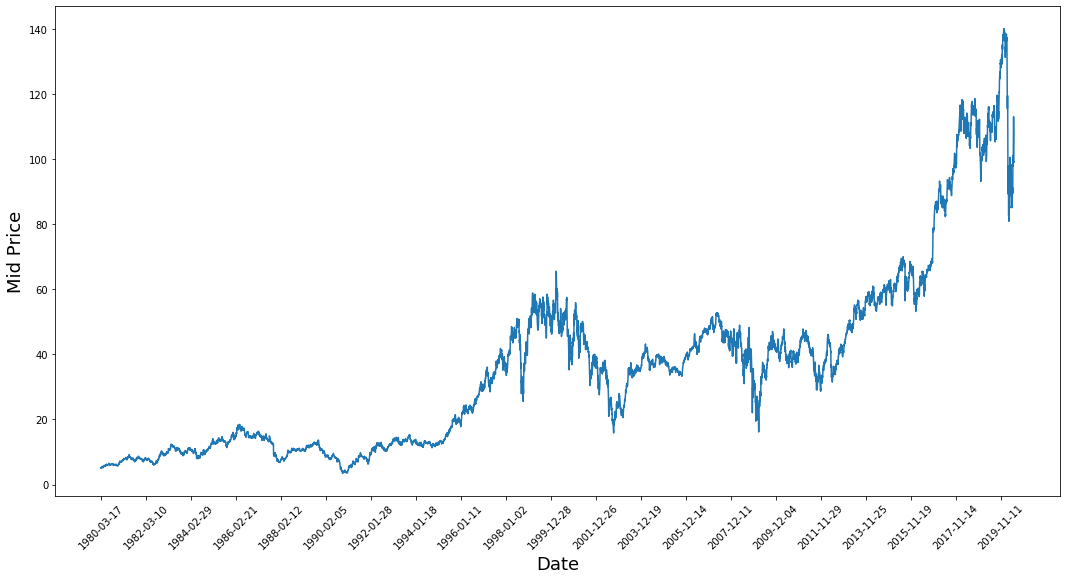

In [29]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,5.129630,5.018518,5.037037,0.290579,62400
1,1980-03-18,0.0,5.111111,5.037037,5.074074,0.292716,63900
2,1980-03-19,0.0,5.166667,5.111111,5.148148,0.296989,40500
3,1980-03-20,0.0,5.148148,5.092593,5.111111,0.294852,18900
4,1980-03-21,0.0,5.222222,5.111111,5.222222,0.301262,97200


In [31]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].to_numpy()
low_prices = df.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

In [32]:
df.shape

(10148, 7)

In [33]:
train_data = mid_prices[:6000]
test_data = mid_prices[6000:]

In [34]:
train_data.shape

(6000,)

In [35]:
test_data.shape

(4148,)

In [36]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [41]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,1000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [42]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [45]:
train_data.shape

(6000,)

In [50]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(6000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

# AR Model

In [202]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


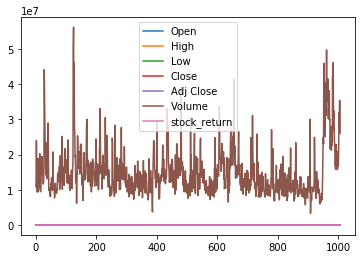

In [203]:
df.plot()

In [204]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
stock_return    float64
dtype: object

In [205]:
df['stock_return'] = df['Adj Close'].pct_change()
#df['stock_return'] = ((df['Close']-df['Open'])/df['Close'])

In [206]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock_return
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,NaN
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,0.000000
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.001893


In [215]:
from statsmodels.tsa.ar_model import AR

#create train/test datasets
X = df['stock_return'].dropna()
train_data = X[1:len(X)-500]
test_data = X[X[len(X)-500:]]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

C:\Users\krish\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [216]:
train_data.shape

(506,)

In [217]:
test_data.shape

(500,)

In [218]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 18


In [219]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const               0.001416
L1.stock_return     0.010087
L2.stock_return    -0.047314
L3.stock_return     0.042740
L4.stock_return    -0.098091
L5.stock_return    -0.022312
L6.stock_return     0.035648
L7.stock_return    -0.035855
L8.stock_return    -0.018881
L9.stock_return    -0.024801
L10.stock_return    0.015490
L11.stock_return   -0.027277
L12.stock_return    0.027029
L13.stock_return   -0.028012
L14.stock_return    0.016457
L15.stock_return    0.030064
L16.stock_return    0.058296
L17.stock_return    0.051050
L18.stock_return   -0.027077
dtype: float64


C:\Users\krish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


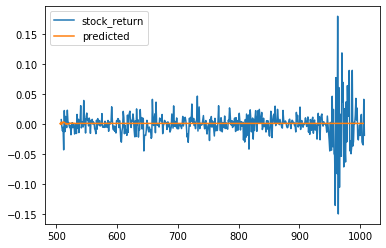

In [220]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [df['stock_return'].tail(500),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
compare_df.plot()

In [222]:
from sklearn.metrics import r2_score
r2 = r2_score(df['stock_return'].tail(500), predictions)

In [223]:
r2

-0.004443950355070836

In [224]:
# MA example
from statsmodels.tsa.arima_model import ARMA

#create train/test datasets
X = df['stock_return'].dropna()
train_data = X[1:len(X)-200]
test_data = X[X[len(X)-200:]]

#train the autoregression model
model = ARMA(train_data,order=(0, 1))
model_fitted = model.fit()

C:\Users\krish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [225]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const                 0.000970
ma.L1.stock_return    0.015197
dtype: float64


C:\Users\krish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


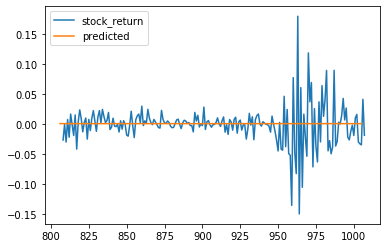

In [226]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [df['stock_return'].tail(200),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
compare_df.plot()

In [227]:
predictions

806     0.00101
807     0.00097
808     0.00097
809     0.00097
810     0.00097
         ...   
1001    0.00097
1002    0.00097
1003    0.00097
1004    0.00097
1005    0.00097
Length: 200, dtype: float64

In [228]:

# make prediction
yhat = model_fit.predict(len(df['stock_return']), len(df['stock_return']))
print(yhat)

1008   NaN
dtype: float64


In [231]:
r2 = r2_score(df['stock_return'].tail(200),yhat)

ValueError: Found input variables with inconsistent numbers of samples: [200, 1]

In [230]:
r2

-0.004443950355070836

In [252]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [253]:
df.head()

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,stock_return
0,0,2016-07-16,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.038599
1,1,2016-08-16,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.010150
2,2,2016-09-16,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.001893
3,3,2016-10-16,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.000787
4,4,2016-11-16,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,0.017019


In [254]:
df.tail()

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,stock_return
992,992,2099-10-16,2020-05-08,92.800003,94.080002,92.110001,92.699997,92.699997,20494900,0.016336
993,993,2099-11-16,2020-05-11,91.110001,91.110001,89.330002,89.970001,89.970001,31872000,-0.029450
994,994,2099-12-16,2020-05-12,90.150002,90.790001,86.900002,87.029999,87.029999,27962900,-0.032678
995,995,2100-01-16,2020-05-13,86.379997,86.860001,83.400002,84.029999,84.029999,35451600,-0.034471
996,996,2100-02-16,2020-05-14,82.720001,88.110001,82.400002,87.519997,87.519997,35152500,0.041533


In [255]:
df.shape

(997, 10)

In [248]:
df.index.name=None
df.reset_index(inplace=True)
df.drop(df.index[997], inplace=True)

In [256]:
#start = datetime.datetime.strptime("2016-05-16", "%Y-%m-%d")
#date_list = [start + relativedelta(months=x) for x in range(0,997)]
df['index'] = df['Date']
df.set_index(['index'], inplace=True)
df.index.name=None

In [257]:
df = df[df.stock_return != 0]
df = df[df['stock_return'].notna()]

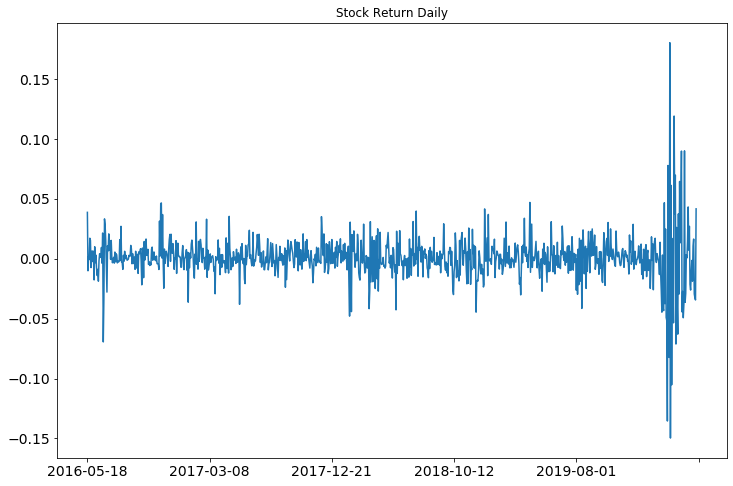

In [258]:
df.stock_return.plot(figsize=(12,8), title= 'Stock Return Daily', fontsize=14)

C:\Users\krish\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

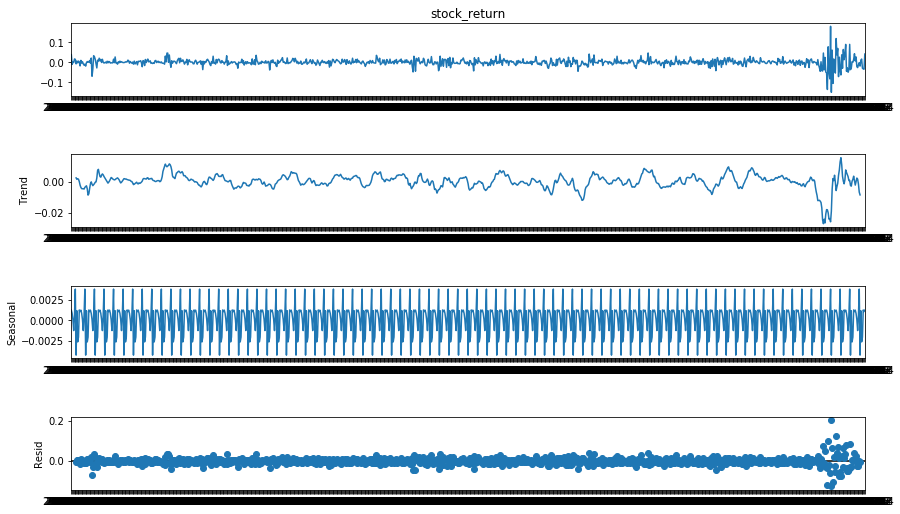

In [259]:

decomposition = seasonal_decompose(df.stock_return, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [266]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #ts_log.rolling(12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

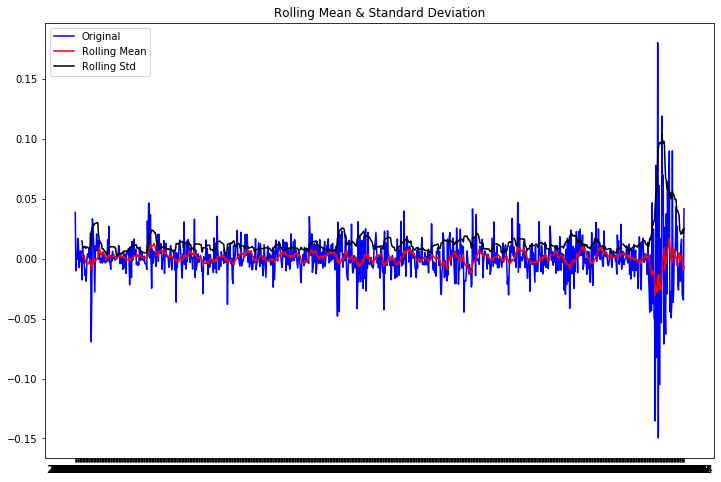

Results of Dickey-Fuller Test:
Test Statistic                -7.531888e+00
p-value                        3.560608e-11
#Lags Used                     1.700000e+01
Number of Observations Used    9.790000e+02
Critical Value (1%)           -3.437047e+00
Critical Value (5%)           -2.864497e+00
Critical Value (10%)          -2.568344e+00
dtype: float64


In [267]:
test_stationarity(df.stock_return)

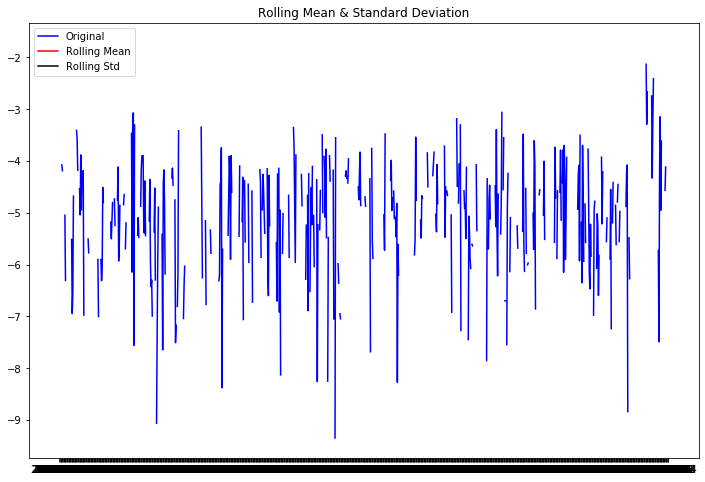

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [269]:
df.stock_return_log= df.stock_return.apply(lambda x: np.log(x))  
test_stationarity(df.stock_return_log)

In [ ]:
df['first_difference'] = df.riders - df.riders.shift(1)  
test_stationarity(df.first_difference.dropna(inplace=False))